In [61]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

# linear models 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Pearson correlation
from scipy.stats import pearsonr

from sklearn.preprocessing import PolynomialFeatures


### Morning exercise
1. Read the `interactions.csv` file
2. Find the correlation between any of the independent variables (processing time, temperature, pressure) and the dependent variable (strength)
3. Include `temperature*pressure` as an interaction effect, and compute it's correlation with the target

In [ ]:
df = pd.read_csv("/Users/wukaiti/Spiced/my_encounter_notes/week_03/Feature_Expansion/interactions.csv")
df.head()
df["T*P"] = (df["Temperature"]*df["Pressure"]).round(2)
df

In [ ]:
# initial feature & target
X,y = df[['Temperature']], df['Strength']


pf = PolynomialFeatures(
    degree = 3,
    interaction_only = False,
    include_bias = True # when it is true, it is always 1
)
pf=pf.reshape(-1,1)
features = pf.fit_transform(pf)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

### Afternoon exercise -- Regularization

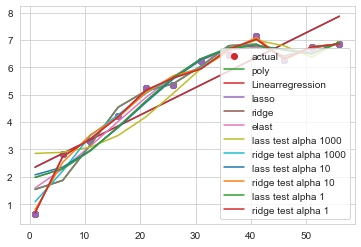

In [66]:
# data analysis and visualization stack
import numpy as np
import matplotlib.pyplot as plt

# machine learning stack
from sklearn.linear_model import LinearRegression
#Create data following $\sqrt{x}$ 
# specify a random state
np.random.seed(13)
# create a data set fluctuating around squre root of x
X=np.arange(1,60, 5) # from 1 to 60 in steps of 6
y=[np.sqrt(xi)+np.random.normal(0, 0.5) for xi in X]
X
y
plt.scatter(X,y)
X
X.shape
# reshape the X to a 2D array for later use in sklearn mdels
X=X.reshape(-1,1)
X.shape
X
### Underfitting (high bias)
# fit linear regression on the data
model=LinearRegression()
model.fit(X,y)
# predict y by lr model
y_pred=model.predict(X)
# plot both linear regression line and the original data
plt.scatter(X,y)
plt.plot(X, y_pred)
### Underfitting:

#To see if you got an underfitting model, compare the scores:       
#`model.score(X_train, y_train)`    
#`model.score(X_test, y_test)`
     
#If both scores are weak, you have probably an underfit situation
     
#How could it happen?
# * Small data sets 
# * Weak feature engineering
#     * Too little features
#     * Features uninformative
### Overfit
# additional pakages from sklearn for adding more terms to the equation
from sklearn.preprocessing import PolynomialFeatures
# convert the feature matrix to a polynomial form with the degree of 10
poly=PolynomialFeatures(degree=10, include_bias=False)
X_poly=poly.fit_transform(X)
X_poly.shape
X_poly
# fit the linear regression model on X_poly
model=LinearRegression()
model.fit(X_poly,y)
y_pred_poly=model.predict(X_poly)
# plot the fitted line and original data
plt.scatter(X,y)
plt.plot(X,y_pred_poly)
### Overfitting: 
#To see if you got an overfitting model, compare the scores:     
# `model.score(X_train, y_train)`    
# `model.score(X_test, y_test)`
     
#If the train score is exceptionally good and the test score is weak, you probably have an overfit situation
# importing new packages for lasso, ridge and elasticnet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
# naming new models
lasso=Lasso()
ridge=Ridge()
elast=ElasticNet()
# fitting new models on X_poly
lasso.fit(X_poly, y)
ridge.fit(X_poly, y)
elast.fit(X_poly, y)
#If the model does not converge, the gradient did not reduce under the set tolerance during the set maximal iteration steps. This can happen easily with regularization, still you can try the following:     
#* increase `max_iter` (maybe some more steps help)
#* increase `tol` (being more generous could help)   

#Both measures should be taken carefully since it could increase the optimization time or make the results worst
# calculate y_pred by new models
y_lasso=lasso.predict(X_poly)
y_ridge=ridge.predict(X_poly)
y_elast=elast.predict(X_poly)
# plot all the models and comparing them
plt.scatter(X,y, label='actual')
plt.plot(X, y_pred_poly, label='poly')
plt.plot(X, y_pred, label='Linearregression')
plt.plot(X, y_lasso, label='lasso')
plt.plot(X, y_ridge, label='ridge')
plt.plot(X, y_elast, label='elast')
plt.legend()
lasso.coef_
ridge.coef_
### Additional Reading
#[Regularization in Machine Learning](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)
#<hr style="border:2px solid black">
## 3. Your Task
# check the lasso and Ridge results by changing the hyperparameter
lasso_1=Lasso(alpha=1) # 1, 10, 100, 1000
ridge_1=Ridge(alpha=1) # 1, 10, 100, 1000
plt.scatter(X,y)
plt.plot(X,y_pred_poly)


lasso_1=Lasso(alpha=1) # 1, 10, 100, 1000
ridge_1=Ridge(alpha=1) # 1, 10, 100, 1000
lasso_10=Lasso(alpha=10) # 1, 10, 100, 1000
ridge_10=Ridge(alpha=10) # 1, 10, 100, 1000
lasso_1000=Lasso(alpha=1000) # 1, 10, 100, 1000
ridge_1000=Ridge(alpha=1000) # 1, 10, 100, 1000


lasso_1.fit(X_poly, y)
ridge_1.fit(X_poly, y)
lasso_10.fit(X_poly, y)
ridge_10.fit(X_poly, y)
lasso_1000.fit(X_poly, y)
ridge_1000.fit(X_poly, y)


testlass1 = lasso_1.predict(X_poly)
test_ridge1 = ridge_1.predict(X_poly)
testlass10 = lasso_10.predict(X_poly)
test_ridge10 = ridge_10.predict(X_poly)
testlass1000 = lasso_1000.predict(X_poly)
test_ridge1000 = ridge_1000.predict(X_poly)

plt.plot(X, testlass1000, label='lass test alpha 1000')
plt.plot(X, test_ridge1000, label='ridge test alpha 1000')
plt.plot(X, testlass10, label='lass test alpha 10')
plt.plot(X, test_ridge10, label='ridge test alpha 10')
plt.plot(X, testlass1, label='lass test alpha 1')
plt.plot(X, test_ridge1, label='ridge test alpha 1')

plt.legend()

In [70]:
print(lasso_1.coef_)
print(lasso_10.coef_)
print(lasso_1000.coef_)


[ 0.00000000e+00  1.00137732e-02 -1.65362515e-04 -5.55518071e-07
  1.72286622e-09  6.96619016e-11  1.14617517e-12  1.54357341e-14
  1.80163388e-16  1.64757212e-18]
[ 0.00000000e+00  8.85998538e-03 -1.13117060e-04 -1.16050890e-06
  1.06813308e-10  8.23745236e-11  1.45843983e-12  1.89416858e-14
  1.93821038e-16  1.11913698e-18]
[ 0.00000000e+00  0.00000000e+00  1.93234342e-04 -1.26042410e-06
 -4.88792098e-08 -2.15869935e-10  8.29594352e-13  4.63878540e-14
  9.67456925e-16  1.63446080e-17]
